In [11]:
import sklearn
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_json('MVPAresults.json')
df

,xdawn_y_pred,xdawn_y_time_pred,y_pred,y_time_pred,y_true
Delta,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[[2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[[1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."


In [13]:
df.index

Index(['Delta'], dtype='object')

In [14]:
def simple_report(y_pred, y_true):
    return sklearn.metrics.classification_report(y_pred=y_pred, y_true=y_true)


def time_report(y_preds, y_true, label=''):
    plt.style.use('ggplot')
    scores = np.zeros(y_preds.shape[0])
    for j, y_pred in enumerate(y_preds):
        scores[j] = sklearn.metrics.precision_score(y_pred=y_pred, y_true=y_true, average='weighted')
    plt.plot(scores, label=label)

Delta
              precision    recall  f1-score   support

           1       0.96      0.86      0.91       448
           2       0.98      0.99      0.99      2594

    accuracy                           0.97      3042
   macro avg       0.97      0.93      0.95      3042
weighted avg       0.97      0.97      0.97      3042

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       448
           2       0.99      1.00      0.99      2594

    accuracy                           0.99      3042
   macro avg       0.99      0.97      0.98      3042
weighted avg       0.99      0.99      0.99      3042



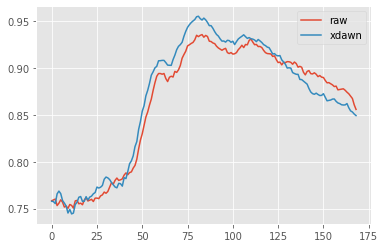

In [15]:
for index in df.index:
    print(index)
    se = df.loc[index]
    y_true = se['y_true']
    print(simple_report(y_pred=se['y_pred'], y_true=y_true))
    time_report(y_preds=np.array(se['y_time_pred']).transpose(), y_true=y_true, label='raw')
    print(simple_report(y_pred=se['xdawn_y_pred'], y_true=y_true))
    time_report(y_preds=np.array(se['xdawn_y_time_pred']).transpose(), y_true=y_true, label='xdawn')
    plt.legend()
    plt.show()